In [56]:
import matplotlib.pyplot as plt
from qbstyles import mpl_style
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from pathlib import Path
import statistics

mpl_style(dark=True)
# plt.style.use("../mpl styles/dracula.mplstyle")
# pd.set_option('future.no_silent_downcasting', True)
print("Voila!")

Voila!


In [3]:
def model_line(model, X, y, color_dp3d="black", color_dp2d="red", color_line2d="white", color_line3d="white", alpha=0.5):
    if X.shape[1] == 1:  # 2D Case
        plt.scatter(X.iloc[:, 0], y, marker=".", color=color_dp2d, label="Data")
        plt.plot(X.iloc[:, 0], model.predict(X), color=color_line2d, label="Model Prediction")
        plt.xlabel(X.columns[0])
        plt.ylabel(y.name)
        plt.legend()
        plt.show()

    elif X.shape[1] == 2:  # 3D Case
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, color=color_dp3d, label="Data", marker=".")
        
        # Plot for model predictions
        X_vals = X.iloc[:, 0]
        Y_vals = X.iloc[:, 1]
        Z_vals = model.predict(X)
        ax.plot_trisurf(X_vals, Y_vals, Z_vals, color=color_line3d, alpha=alpha, label="Model Prediction")

        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        ax.legend()
        plt.show()

    else:
        raise ValueError



def predictor_line(model, X, y, dot_color="yellow", line_color="cyan", marker="."):
    pred = model.predict(X)
    start = min(y.min(), pred.min())
    end = max(y.max(), pred.max())
    line = np.linspace(start, end, 100)

    plt.scatter(y, pred, marker=marker, color=dot_color)
    plt.plot(line, line, color=line_color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")


def one_hot_encode(df, column):
    return pd.concat(
        [df, pd.get_dummies(df[column])],
        axis='columns',
    )


def model_equation(model, feature_names, target_label, variable_as_name=False):
    coef = model.coef_
    intercept = model.intercept_
    if variable_as_name:
        variables = [f"{name}" for name in feature_names]
        y = target_label
    else:
        variables = [f"x{i}" for i in range(1, len(feature_names) + 1)]
        y = "y"
        for variable, feature_name in zip(variables, feature_names):
            print(f"{variable} = {feature_name}")
        print(f"{y} = {target_label}")
    
    feature_names = variables

    terms = [f"{coef[i]:.2f} * {feature_names[i]}" for i in range(len(coef))]
    equation = f"{y} = {terms[0]}"
    for term in terms[1:]:
        if term.startswith('-'):
            equation += f" - {term[1:]}"  # Remove the '-' to avoid '--'
        else:
            equation += f" + {term}"
    equation += f" + {intercept:.2f}" if intercept >= 0 else f" - {-intercept:.2f}"
    return equation

In [7]:
filepath = Path(r"../sample csv data/penguins.csv")
filepath.exists()

True

In [8]:
species = 'species'
island = 'island'
bill_length = 'bill_length_mm'
bill_depth = 'bill_depth_mm'
flipper_length = 'flipper_length_mm'
weight = 'body_mass_g'
gender = 'sex'
year = 'year'

adelie, gentoo, chinstrap = 'Adelie', 'Gentoo', 'Chinstrap'
SPECIES = [adelie, gentoo, chinstrap]
YEAR = [2007, 2008, 2009]
m, f = 'male', 'female'
GENDER = [m, f]
biscoe = 'Biscoe'
dream = 'Dream'
torgersen = 'Torgersen'
ISLAND = [biscoe, dream, torgersen]

raw_df = (
    pd.read_csv(filepath, index_col="rowid")
    .dropna()
    .drop_duplicates()
)

In [9]:
raw_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

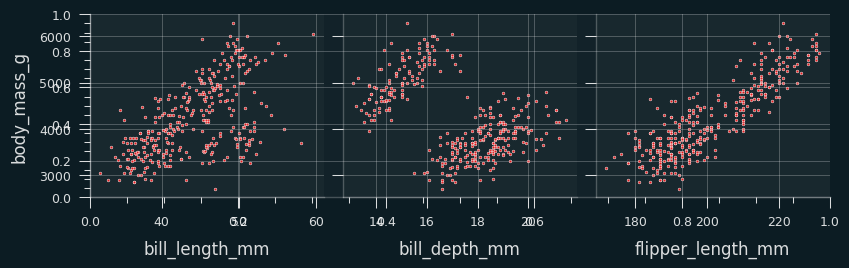

In [57]:
sns.pairplot(
    raw_df, 
    x_vars=[bill_length, bill_depth, flipper_length],
    y_vars=weight, 
    height=3,
    markers='.'
)

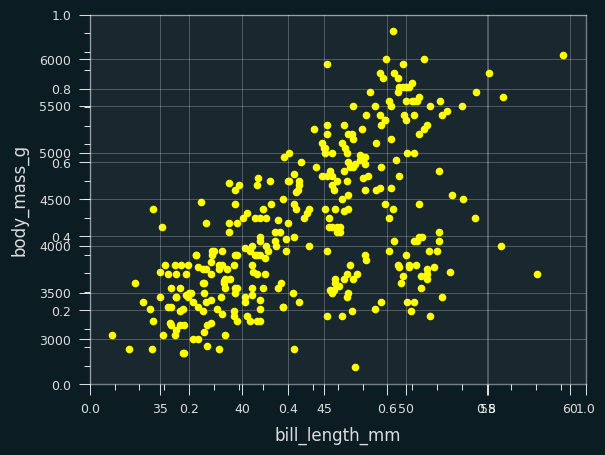

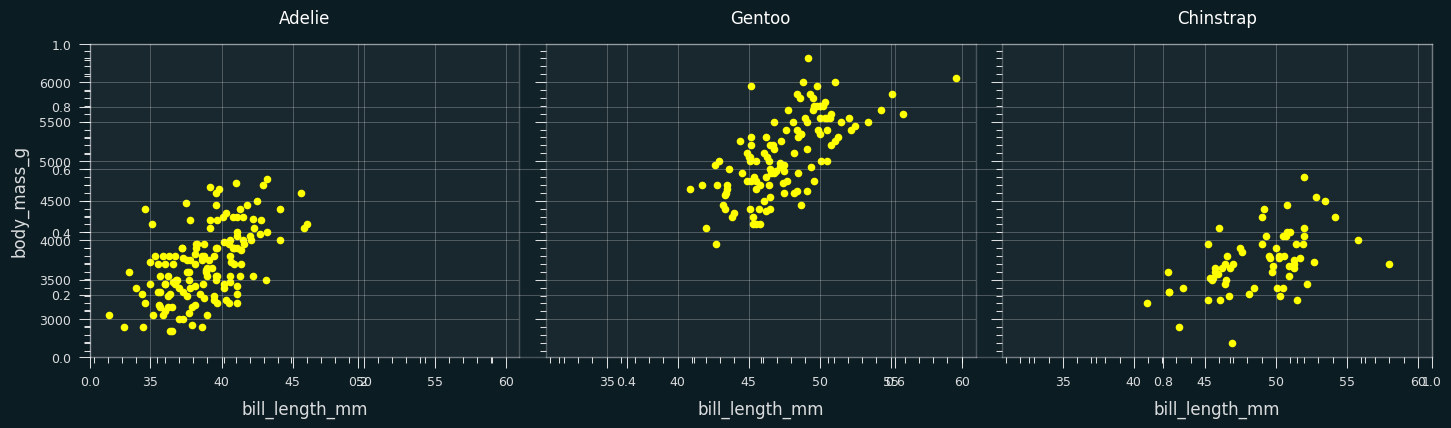

In [58]:
raw_df.plot.scatter(bill_length, weight, color='yellow')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, species_name in zip(axes, [adelie, gentoo, chinstrap]):
    raw_df[raw_df[species] == species_name].plot.scatter(x=bill_length, y=weight, color='yellow', ax=ax)
    ax.set_title(species_name.capitalize())


plt.tight_layout(rect=[0, 0, 1, 0.95])

In [7]:
raw_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


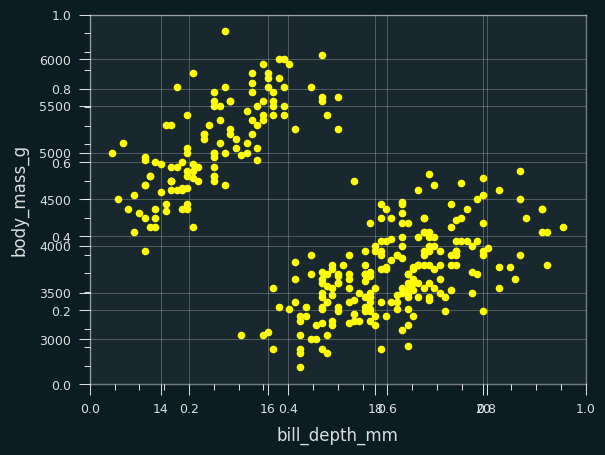

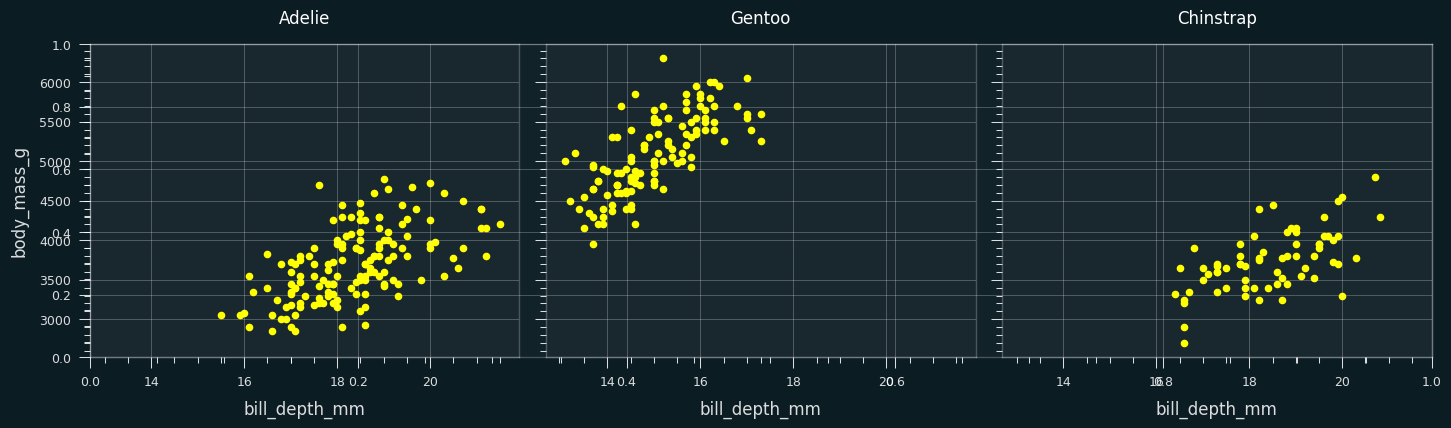

In [59]:
raw_df.plot.scatter(bill_depth, weight, color='yellow')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, species_name in zip(axes, [adelie, gentoo, chinstrap]):
    raw_df[raw_df[species] == species_name].plot.scatter(x=bill_depth, y=weight, color='yellow', ax=ax)
    ax.set_title(species_name.capitalize())


plt.tight_layout(rect=[0, 0, 1, 0.95])

In [51]:
species_fe = "species_fe"
k1, k2, k3 = 0, 1, 0
mapping = {adelie: k1, gentoo: k2, chinstrap: k3}

df = raw_df.replace({species: mapping})
df[species] = df[species].astype(int)
df[species_fe] = df[bill_depth] * df[species]

In [52]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year', 'species_fe'],
      dtype='object')

In [53]:
features = [bill_depth, species_fe]
label = weight

X, y = df[features], df[label]
train_size = 0.50
n = int(len(df) * train_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=False)
df_train = df.iloc[:n]
df_test = df.iloc[n:]

model = LinearRegression()
model.fit(X_train, y_train)
w1, w2, *_ = model.coef_
b1 = model.intercept_

print(f"Accuracy on entire set: {model.score(X, y) * 100 : .2f}")
print(f"Accuracy on train set: {model.score(X_train, y_train) * 100 : .2f}")
print(f"Accuracy on test set: {model.score(X_test, y_test) * 100 : .2f}")
print(f"The MSE: {mean_squared_error(y_test, model.predict(X_test)) : .2f}")
print()
print(model_equation(model, features, label))

Accuracy on entire set:  80.21
Accuracy on train set:  66.16
Accuracy on test set:  82.44
The MSE:  112761.29

x1 = bill_depth_mm
x2 = species_fe
y = body_mass_g
y = 230.58 * x1 + 152.21 * x2 - 525.26


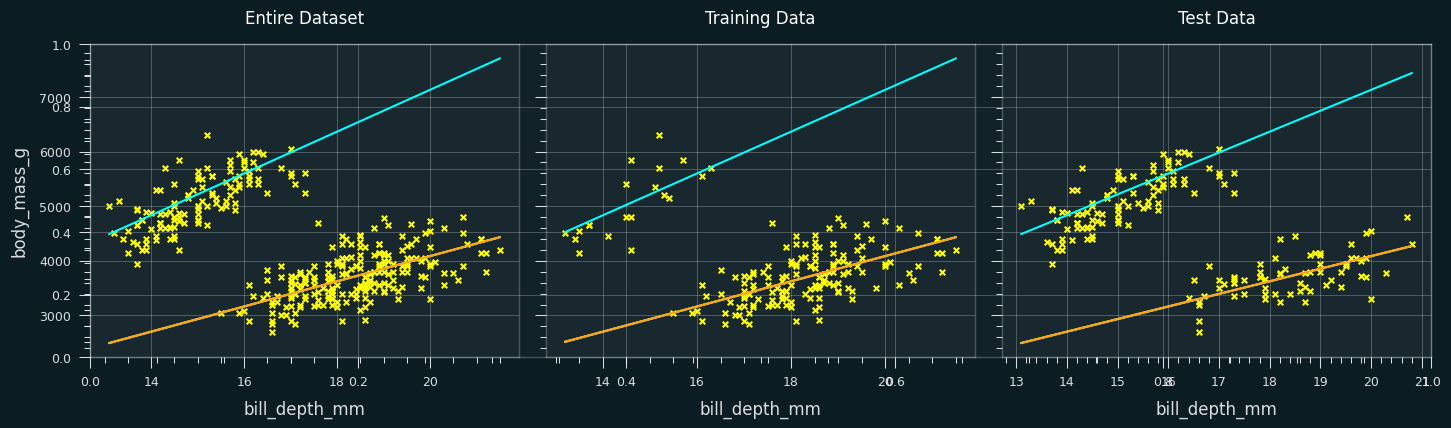

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# First plot (entire dataset)
x = np.linspace(X[bill_depth].min(), X[bill_depth].max(), 100)
axes[0].scatter(X[bill_depth], y, color='yellow', marker='x')
axes[0].plot(x, w1 * x + w2 * x * k1 + b1, color='white')
axes[0].plot(x, w1 * x + w2 * x * k2 + b1, color='cyan')
axes[0].plot(x, w1 * x + w2 * x * k3 + b1, color='orange')
axes[0].set_title("Entire Dataset")
axes[0].set_xlabel(f"{bill_depth}")
axes[0].set_ylabel(f"{label}")

# Second plot (training data)
x = np.linspace(X_train[bill_depth].min(), X_train[bill_depth].max(), 100)
axes[1].scatter(X_train[bill_depth], y_train, color='yellow', marker='x')
axes[1].plot(x, w1 * x + w2 * x * k1 + b1, color='white')
axes[1].plot(x, w1 * x + w2 * x * k2 + b1, color='cyan')
axes[1].plot(x, w1 * x + w2 * x * k3 + b1, color='orange')
axes[1].set_title("Training Data")
axes[1].set_xlabel(f"{bill_depth}")

# Third plot (test data)
x = np.linspace(X_test[bill_depth].min(), X_test[bill_depth].max(), 100)
axes[2].scatter(X_test[bill_depth], y_test, color='yellow', marker='x')
axes[2].plot(x, w1 * x + w2 * x * k1 + b1, color='white')
axes[2].plot(x, w1 * x + w2 * x * k2 + b1, color='cyan')
axes[2].plot(x, w1 * x + w2 * x * k3 + b1, color='orange')
axes[2].set_title("Test Data")
axes[2].set_xlabel(f"{bill_depth}")

plt.tight_layout(rect=[0, 0, 1, 0.95])

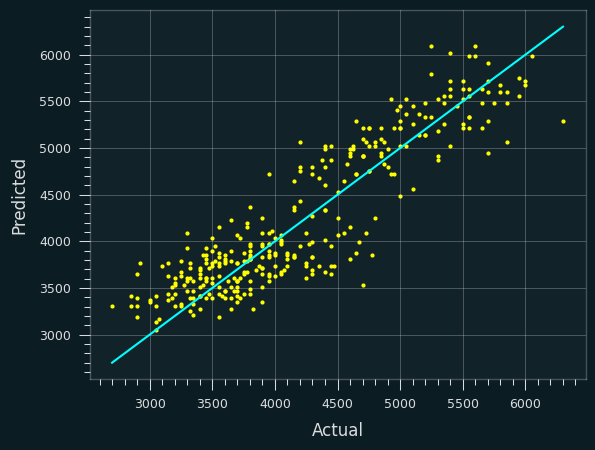

In [61]:
predictor_line(model, X, y)